%%html
<style>
table {float:left}
</style>

# Statistics

## Descriptive Statistics

1. [Intro](#1)<br>
1.1. [Population vs sample](#11)<br>
2. [Descriptive Statistics](#2)<br>
2.1. [Types of data](#21)<br>
2.2. [Levels of measurement](#22)<br>
2.3. [Categorical data and vizualization techniques](#23)<br>
2.4. [Numerical data and vizualization techniques](#24)<br>
3. [Measures of central tendency, asymmetry, and variability](#3)<br>
3.1. [Measures of central tendency](#31)<br>
3.2. [Measures of asymmetry](#32)<br>
3.3. [Measures of variability](#33)<br>
4. [Practical example descriptive statistics](#4)<br>

In [1]:
# importing packages
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd 
import seaborn as sns
import numpy as np
import math
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
sns.set(style = 'whitegrid')
%matplotlib inline

***
## <a class="anchor" id="1">Part 1: Intro</a>

### <a class="anchor" id="11">Part 1.1: Population vs sample</a>

| Word |  | Definition |
|:- | :-: | :- |
| population | - | The collections of all items of interest to our study. |
| sample | - | A subset of the population. |
| parameter | - | A value that refers to a population. It is the opposite of statistic. |
| statistic | - | A value that refers to a sample. It is the opposite of a parameter. |
| random sample | - | A sample where each member is chosen from the population strictly by chance. |

***
## <a class="anchor" id="2">Part 2: Descriptive Statistics</a>

### <a class="anchor" id="21">Part 2.1: Types of data</a>

| Word |  | Definition |
| :- | :-: | :- |
| representative sample | - | A sample taken from the population to reflect the population as a whole
| variable | - | A characteristic of a unit which may assume more than one value. Eg. height, occupation, age etc.
| type of data | - | A way to classify data. There are two types of data - categorical and numerical. 
| categorical data | - | A subgroup of types of data. Describes categories or groups.
| numerical data | - | A subgroup of types of data. Represents numbers. Can be further classified into discrete and continuous.
| discrete data | - | Data that can be counted in a finite matter. Opposite of continuous.
| continuous data | - | Data that is 'infinite' and impossible to count. Opposite of discrete. 




### <a class="anchor" id="22">Part 2.2: Levels of measurement</a>

| Word |  | Definition |
| :- | :-: | :- |
| levels of measurement | - | A way to classify data. There are two levels of measurement - qualitative and quantitative, which are further classed into nominal & ordinal, and ratio & interval, respectively. |
| qualitative data | - | A subgroup of levels of measurement. There are two types of qualitative data - nominal and ordinal. |
| quantitative data | - | A subgroup of levels of measurement. There are two types of quantitative data - ratio and interval. |
| nominal | - | Refers to variables that describe different categories and cannot be put in any order. |
| ordinal | - | Refers to variables that describe different categories, but can be ordered. |
| ratio | - | A number that has a unique and unambiguous zero point, no matter if a whole number or a fraction  |
| interval | - | An interval variable represents a number or an interval. There isn't a unique and unambiguous zero point. For example, degrees in Celsius and Fahrenheit are interval variables, while Kelvin is a ratio variable. |

### <a class="anchor" id="23">Part 2.3: Categorical data and vizualization techniques</a>

| Word |  | Definition |
| :- | :-: | :- |
| frequency distribution table | - | A table that represents the frequency of each variable.
| frequency | - | Measures the occurrence of a variable.
| absolute frequency | - | Measures the NUMBER of occurrences of a variable.
| relative frequency | - | Measures the RELATIVE NUMBER of occurrences of a variable. Usually, expressed in percentages. 
| cumulative frequency | - | The sum of relative frequencies so far. The cumulative frequency of all members is 100% or 1. 
| Pareto diagram | - | A type of bar chart where frequencies are shown in descending order. There is an additional line on the chart, showing the cumulative frequency.|


In [6]:
'''
Categorical variables
Title: Ice cream shop				
Background: There is an ice cream shop, that is operating in New York, LA and San Francisco.			
Data: You have sold 12,327 ice creams in New York; 17,129 in LA and 19,923 in San Francisco.			
TODO:
1. Create the dataframe and order the data in a frequency distribution table by units sold.
2. Create a bar chart, representing the data.
3. Create a new column in table, representing the relative frequency of input.
4. Create a pie chart, representing the share of each city to the sales of company.
5. Create new column with cumulative frequency and represent it in pareto chart
'''
# Task 1
# creating dataframe
df = pd.DataFrame({'City': ['New York', 'LA', 'San Francisco']
                  ,'Units_Sold': [12327,17129,19923]})
# sorting by units sold
df = df.sort_values(by = 'Units_Sold'
                   ,ascending = False)
# checking the results
df.head()

,City,Units_Sold
2,San Francisco,19923
1,LA,17129
0,New York,12327


Text(0.5, 1.0, 'Units sold by city')

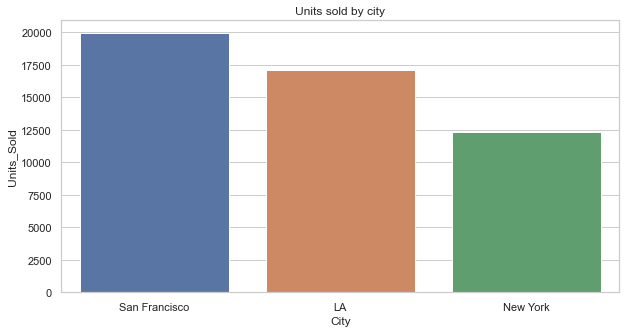

In [9]:
# Task 2
# creating a barchart
plt.figure(figsize = (10,5))	
sns.barplot(data = df
           ,x = 'City'
           ,y = 'Units_Sold').set_title('Units sold by city')

In [10]:
# Task 3
# calculating total number of units sold
Ratio = df['Units_Sold'].sum().astype('int')
# creating new column with relative ratio in %
df['Units_Sold_Ratio'] = df['Units_Sold'].apply(lambda x: (x/Ratio)*100)
# checking the results
df.head()

,City,Units_Sold,Units_Sold_Ratio
2,San Francisco,19923,40.347111
1,LA,17129,34.688835
0,New York,12327,24.964054


<AxesSubplot:title={'center':'Units sold by city'}, ylabel='Units_Sold_Ratio'>

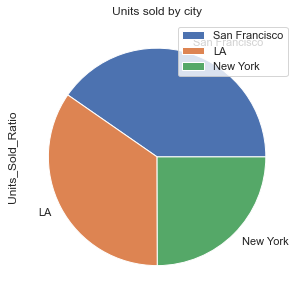

In [13]:
# Task 4 
# creating a pie chart, representing the share of each city to the sales of company.
df[['City','Units_Sold_Ratio']].set_index('City').plot(kind = 'pie'
                                                      ,y = 'Units_Sold_Ratio'
                                                      ,figsize = (10,5)
                                                      ,title = 'Units sold by city')

<AxesSubplot:label='dfdcb568-9f5f-4ab2-8013-cf356b53946e', title={'center':'Pareto chart for units sold by city'}>

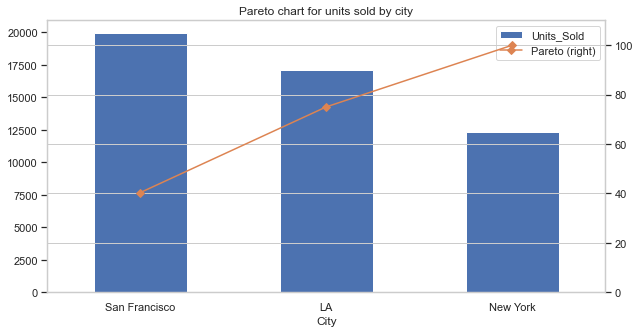

In [33]:
# Task 5
# creating cumulative frequency column
df['Pareto'] = 100 * df.Units_Sold.cumsum() / df.Units_Sold.sum()
fig, axes = plt.subplots()
df.plot(use_index = True
       ,y = 'Units_Sold'
       ,x= 'City'
       ,kind = 'bar'
       ,ax = axes)
ax2 = df.plot(use_index=True
             ,y = 'Pareto'
             ,x= 'City'
             ,marker = 'D'
             ,color = 'C1'
             ,kind = 'line'
             ,ax = axes
             ,secondary_y = True
             ,figsize = (10,5))
ax2.set_ylim([0,110])
ax2.set_title('Pareto chart for units sold by city')
ax2

### <a class="anchor" id="24">Part 2.4: Numerical data and vizualization techniques</a>

| Word |  | Definition |
| :- | :-: | :- |
| histogram | - | A type of bar chart that represents numerical data. It is divided into intervals (or bins) that are not overlapping and span from the first observation to the last. The intervals (bins) are adjacent - where one stops, the other starts.
| bins (histogram) | - | The intervals that are represented in a histogram. |
| cross table | - | A table which represents categorical data. On one axis we have the categories, and on the other - their frequencies. It can be built with absolute or relative frequencies.
| contigency table | - | See cross table.
| scatter plot | - | A plot that represents numerical data. Graphically, each observation looks like a point on the scatter plot.

In [98]:
'''
Numerical variables. Frequency distribution table		
Background	You are given a dataset.
TODO:
1. Given that we want to divide the numbers into 6 intervals of equal width, calculate that interval width. Round up to the nearest whole number, bigger than the result that you obtain	
2. Create a frequency distribution table that shows 	
- The intervals 
- The absolute frequency of each interval
- The relative frequency of each interval
3. Repeat task 1 and 2, but this time, use the exact interval width. Don't round up to the nearest whole number, that is.
4. Create a histogram with 6 intervals, based on given dataset.
'''
# Task 1
# creating a dataframe
df = pd.DataFrame({'Nums': [8,30,30,54,86,94,102,110,169,170,176,236,240,241,242,255,262,276,279,282]})
# number of desider intervals
di = 6
print('Number of desired intervals: {}'.format(di))
# calculating interval width and rounding up to nearest number
iw = round((df['Nums'].max()-df['Nums'].min())/di)
print('Interval width: {}'.format(iw))
# adding interval widths to the dataframe


Number of desired intervals: 6
Interval width: 46


In [99]:
# Task 2
# the intervals
intervals = pd.cut(pd.Series(df['Nums']), 6).astype('str')
df['Intervals'] = intervals
# creating lower and upper interval columns
df['lower_interval'] = np.round(intervals.str.replace('(','').str.replace(']','').str.split(',').str[0].astype('float'))
df['upper_interval'] = np.round(intervals.str.replace('(','').str.replace(']','').str.split(',').str[1].astype('float'))
# calculating absolute frequency
df = df.groupby(['Intervals','lower_interval','upper_interval']).count().reset_index().sort_values(by = 'lower_interval').rename(columns = {'Intervals': 'Intervals','lower_interval': 'Lower_Interval', 'upper_interval': 'Upper_Interval', 'Nums': 'Absolute_Frequency'})
# calculating relative frequency
total_frequency = df['Absolute_Frequency'].sum()
df['Relative_Frequency'] = df['Absolute_Frequency'].apply(lambda x: x/total_frequency)
df.head()

,Intervals,Lower_Interval,Upper_Interval,Absolute_Frequency,Relative_Frequency
4,"(7.726, 53.667]",8.0,54.0,3,0.15
3,"(53.667, 99.333]",54.0,99.0,3,0.15
5,"(99.333, 145.0]",99.0,145.0,2,0.10
0,"(145.0, 190.667]",145.0,191.0,3,0.15
1,"(190.667, 236.333]",191.0,236.0,1,0.05


Text(0.5, 1.0, 'Relative frequency by intervals')

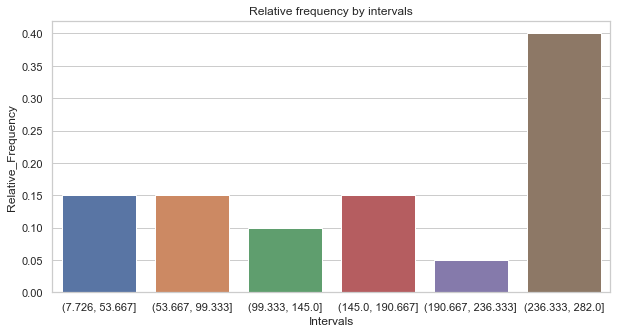

In [100]:
# creating histogram
plt.figure(figsize=(10,5))
sns.barplot(data = df
            ,x = 'Intervals'
            ,y = 'Relative_Frequency').set_title('Relative frequency by intervals')

In [101]:
'''
Background: You have employment data about country X. You have been asked to prepare a cross-table showing that data.
60% of 18 to 25-year-olds are employed
85% of 25 to 35-year-olds are employed
5% of 35 to 45-year-olds are unemployed
3% of 45 to 55-year-olds are unemployed
3% of 55 to 65-year-olds are unemployed
All 65+ are employed. Note: the definition of unemployed is: without a job, but actively searching for one. That's probably why all 65+s are employed.
TODO:
1. Create a cross table summarizing the data you have been given.
2. Create a side-by-side bar chart (it is called clustered column chart in Excel), in order to visually enhance your summary.
'''
# creating dataframe
df = pd.DataFrame({'Age_Bins': ['18-25','25-35','35-45','45-55','55-65','>65','18-25','25-35','35-45','45-55','55-65','>65']
                  ,'Employment_Status': ['Employed','Employed','Employed','Employed','Employed','Employed','Unemployed','Unemployed','Unemployed','Unemployed','Unemployed','Unemployed']
                  ,'Values': [60,85,95,97,97,100,40,15,5,3,3,0]})
df.head()

,Age_Bins,Employment_Status,Values
0,18-25,Employed,60
1,25-35,Employed,85
2,35-45,Employed,95
3,45-55,Employed,97
4,55-65,Employed,97


In [102]:
# Task 1
# creating pivot table
df_ct = pd.pivot_table(data = df
                   ,index = 'Age_Bins'
                   ,columns = 'Employment_Status'
                   ,values = 'Values'
                   ,margins = True
                   ,aggfunc = 'sum'
                   ,margins_name = 'Total').reset_index()
df_ct

Employment_Status,Age_Bins,Employed,Unemployed,Total
0,18-25,60,40,100
1,25-35,85,15,100
2,35-45,95,5,100
3,45-55,97,3,100
4,55-65,97,3,100
5,>65,100,0,100
6,Total,534,66,600


Text(0.5, 1.0, 'Employment by Age')

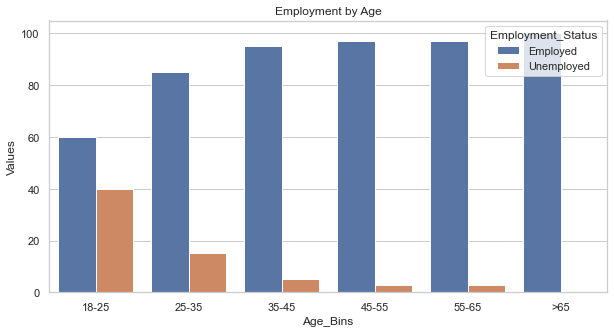

In [103]:
# Task 2
# creating a side-by-side bar chart
plt.figure(figsize = (10,5))
sns.barplot(data = df
           ,x = 'Age_Bins'
           ,y = 'Values'
           ,hue = 'Employment_Status').set_title('Employment by Age')

In [104]:
'''
Background: You are given the closing stock prices of Apple, Alphabet Inc. (Google) and Bank of America on different dates for a period of 6 months.
TODO:
1. Create a scatter plot with Apple and Alphabet stock prices.
2. Create a scatter plot with Apple and Bank of America stock prices
3. Explore if there is a relationship between the two variables.
'''
# reading in the stocks data
df = pd.read_csv('Data/Stocks.csv')
df.head()

,Date,Apple (AAPL),Alphabet (GOOGL),Bank of America (BAC)
0,1/3/2017,116.15,808.01,22.53
1,1/4/2017,116.02,807.77,22.95
2,1/5/2017,116.61,813.02,22.68
3,1/6/2017,117.91,825.21,22.68
4,1/9/2017,118.99,827.18,22.55


Text(0.5, 1.0, 'APPL to GOOGL')

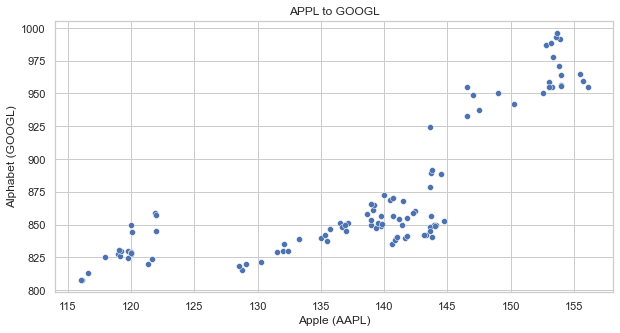

In [105]:
# Task 1
# creating scatter plot for apple and google stocks
plt.figure(figsize=(10,5))
sns.scatterplot(data = df
               ,x =  'Apple (AAPL)'
               ,y = 'Alphabet (GOOGL)').set_title('APPL to GOOGL')

Text(0.5, 1.0, 'APPL to BAC')

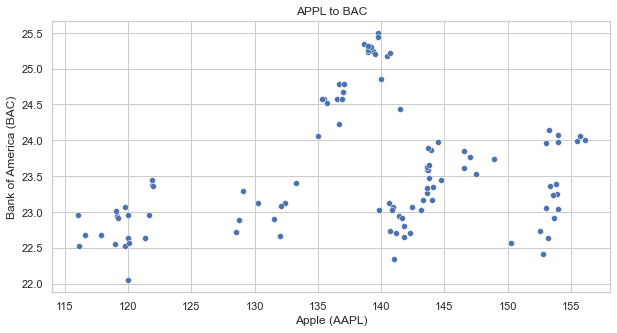

In [106]:
# Task 2 
# creating a scatter plot for Apple and Bank of America stock prices
plt.figure(figsize=(10,5))
sns.scatterplot(data = df
               ,x = 'Apple (AAPL)'
               ,y = 'Bank of America (BAC)').set_title('APPL to BAC')

***
## <a class="anchor" id="3">Part 3: Measures of central tendency, asymmetry, and variability</a>

### <a class="anchor" id="31">Part 3.1: Measures of central tendency</a>

| Word |  | Definition |
| :- | :- | :- |
| measures of central tendency | - | Measures that describe the data through 'averages'. The most common are the mean, median and mode. There is also geometric mean, harmonic<br>mean, weighted-average mean, etc.
| mean | - | The simple average of the dataset.
| median | - | The middle number in an ordered dataset.
| mode | - | The value that occurs most often. A dataset can have 0, 1 or multiple modes.


### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| Mean | (x1 + x2 + xn)/n | Adding all components and the dividing by the number of components |
| Median | (n+1)/2 | Where n is the number of positions |


In [107]:
'''
Background	You have a sample of 11 people and their personal annual income. 	
Task 1	Calculate the mean, median and mode	
Task 2	Try to interpret on the numbers you got	
'''
df = pd.DataFrame({'Annual_Income': [62000,64000,49000,324000,1264000,54330,64000,51000,55000,48000,53000]})
# mean
print('Mean: ', df['Annual_Income'].mean())
# median
print('Median: ', df['Annual_Income'].median())
# mode
print('Mode: ', df['Annual_Income'].mode())

Mean:  189848.18181818182
Median:  55000.0
Mode:  0    64000
dtype: int64


### <a class="anchor" id="32">Part 3.2: Measures of asymetry</a>

| Word |  | Definition |
| :- | :- | :- |
| measures of asymmetry | - | Measures that describe the data through the level of symmetry that is observed. The most common are skewness and kurtosis. |
| skewness | - | A measure that describes the dataset's symmetry around its mean.

If mean > median: Positive or right skew. Right skew meaning outliers are to the right <br>
If mean = median = mode: Zero or no skew. Distribution is symmetrical. <br>
If mean < median: Negative or left skew. Left skew meaning outliers are to the left. <br>

In [112]:
'''
Background,You are given two datasets
TODO:
1. Identify the skewness of dataset 1. You may use the formula from the lesson, the skewness formula in excel (=SKEW) or you can plot it on a graph
2. Identify the skewness of dataset 2. You may use the formula from the lesson, the skewness formula in excel (=SKEW) or you can plot it on a graph
'''
# creating dataframes
df1 = pd.DataFrame({'Nums': [212,869,220,654,511,624,420,121,428,865,799,405,230,670,870,366,99,55,489,312,493,163,221,84,144,48,375,86,168,100]})
df2 = pd.DataFrame({'Nums': [586,760,495,678,559,415,370,659,119,288,241,787,522,207,160,526,656,848,720,676,581,929,653,661,770,800,529,975,995,947]})

### Positive/right skeweness

In [116]:
# checking skeweness of df 1
print('Positive/right skew:', df1.skew())

Positive/right skew: Nums    0.630988
dtype: float64


<Figure size 720x360 with 0 Axes>

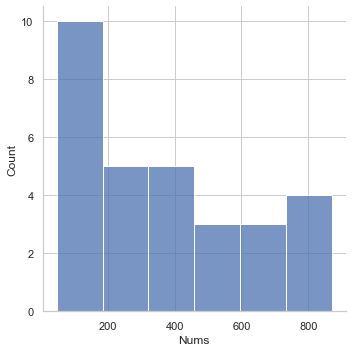

In [119]:
# plotting the results
plt.figure(figsize = (10,5))
sns.displot(df1
           ,x = 'Nums')

### Negative/left skeweness

In [120]:
# Task 2
print('Negative/left skew:', df2.skew())

Negative/left skew: Nums   -0.370641
dtype: float64


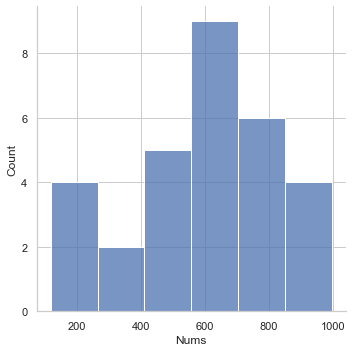

In [121]:
# checking skeweness on chart
sns.displot(df2
           ,x = 'Nums')

### <a class="anchor" id="33">Part 3.3: Measures of variability</a>

### Variance

| Word | | Definition |
| :- | :- | :- |
| sample formula | - | A formula that is calculated on a sample. The value obtained is a statistic.
| population formula | - | A formula that is calculated on a population. The value obtained is a parameter.
| measures of variability | - | Measures that describe the data through the level of dispersion (variability). The most common ones are variance and standard deviation.
| variance | - | Measures the dispersion of the dataset around its mean. It is measured in units squared.<br> Larger the variance larger spread of the data around its mean

### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| Poplation variance | σ2 = (sum((xi - μ)^2))/N | Sum of squared differences between the observed values and the population mean, divided by <br> the total number of observations |
| Sample variance | s2 = (sum((xi - x̄)**2))/(n - 1) | Sum of squared differences between the observed values and the sample mean, divided by <br> the number of sample observations minus 1|

In [139]:
'''
Background	You have the annual personal income of 11 people from the USA. You have the mean income from the exercise on mean, median and mode
1. Decide whether you have to use sample or population formula for the variance
- It is a sample
2. Calculate the variance of their income
3. Generally, what does this number tell you?

Task 3 There is great dispersion between the income of different people in the USA.		

'''
# creating dataframe
df = pd.DataFrame({'Annual_Income': [62000,64000,49000,324000,1264000,54330,64000,51000,55000,48000,53000]})
# calculating mean
x = df['Annual_Income'].mean()
# number of observations in sample
n = df['Annual_Income'].shape[0]
print('Sample Mean: ', x, 'Sample Size: ', n)
# There is great dispersion between the income of different people in the USA.

Sample Mean:  189848.18181818182 Sample Size:  11


In [134]:
# manual variance calculation
s2 = (sum((df['Annual_Income']-x)**2))/(n-1)
print('Variance: ', s2)
# pandas variance
print('Pandas Variance: ', df['Annual_Income'].var())


Variance:  133433409536.36362
Pandas Variance:  133433409536.36362


### Standard deviation

| Word | | Definition |
| :- | :- | :- |
| standard deviation | - | Measures the dispersion of the dataset around its mean. It is measured in original units. It is equal to the square root of the variance.
| coefficient of variation | - | Measures the dispersion of the dataset around its mean. It is also called 'relative standard deviation'. It is useful for comparing different datasets in terms of variability.



### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| Poplation standard deviation | σ = sqrt((sum((xi - μ)^2))/N) | Square root of sum of squared differences between the observed values and the population mean, divided by <br> the total number of observations |
| Sample standard deviation | s = sqrt((sum((xi - x̄)**2))/(n -1)) | Square root of sum of squared differences between the observed values and the sample mean, divided by <br> the number of sample observations minus 1|
| Population coefficient of variation | cv = (sqrt((sum((xi - x̄)**2))/(n -1)))/μ | Standard deviation relative to the mean. |
| Sample coefficient of variation | cv_s = (sqrt((sum((xi - x̄)**2))/(n -1)))/x̄ | Standard deviation relative to the mean. |


In [135]:
'''
Background: You have the annual personal income of 11 people from the USA and 11 from Denmark. You have the mean income for USA from previous exercises
TODO:
1. Decide whether you have to use sample or population formula for the standard deviation and the coefficient of variation
- It is a sample
2. Calculate the standard deviation of income in the USA and in Denmark
3. Calculate the coefficient of variation of income in the USA and in Denmark
4. Try to interpret the numbers you got
# Task 4

Denmark is a much more egalitarian country than the USA. 
Not only the variance is smaller, but also the standard deviation of salaries.
You can get the feeling that almost all people in the country gravitate around the same income.
We can further calculate the median income to see if they differ.
Median US
According to this sample, the average salary in the US is much higher ( $ 189,848 to 504,929.85 kr. = $75,642.41)
However, on the average American earns less than the average Danish, which is evident from the median salary.
Finally, the coefficients of variation of the salaries in the two countries are very different.
In the USA we have much higher variability of income, evident from the coeffcients of variation. In the USA the value is 1.92, while in Denmark it is 0.09.
By all means, a coefficient of variation of 1.92 is extremely high, while 0.09 is extremely low. 

Note that we only needed the coefficient of variation, because the currencies we used were different. 
Had the salaries been in expressed in dollars for both datasets, a comparison of the standard deviations would be sufficient.
'''
# creating dataframes
df1 = pd.DataFrame({'Annual_Income_US': [62000,64000,49000,324000,1264000,54330,64000,51000,55000,48000,53000]})
df2 = pd.DataFrame({'Annual_Income_DM': [462852,470318,567367,589764,500179,492714,515110,507645,425526,522575,500179]})

In [136]:
# calculating mean for us
x_us = df1['Annual_Income_US'].mean()
# number of observations in sample us
n_us = df1['Annual_Income_US'].shape[0]
# calculating mean for Denmark
x_dm = df2['Annual_Income_DM'].mean()
# number of observations in sample Denmark
n_dm = df2['Annual_Income_DM'].shape[0]
print('Mean annual income for US: {}. Mean annual income for Denmark: {}. Sample size US: {}. Sample size Denmark: {}'.format(x_us,x_dm,n_us,n_dm))

Mean annual income for US: 189848.18181818182. Mean annual income for Denmark: 504929.9090909091. Sample size US: 11. Sample size Denmark: 11


In [137]:
# Task 2
# calculating std for us
s_us = np.sqrt((sum((df1['Annual_Income_US'] - x_us)**2))/(n_us-1))
# calculating std for Denmark
s_dm = np.sqrt((sum((df2['Annual_Income_DM'] - x_dm)**2))/(n_dm-1))
print('US std: {}. Denmark std: {}'.format(s_us,s_dm))

US std: 365285.3809507898. Denmark std: 45809.88395194763


In [138]:
# Task 3:
cv_s_us = s_us/x_us
cv_s_dm = s_dm/x_dm
print('Coefficient of variation for US: {}. Coefficient of variation for Denmark'.format(cv_s_us,cv_s_dm))

Coefficient of variation for US: 1.924092069001876. Coefficient of variation for Denmark


### Covariance

| Word |  | Definition |
| :- | :- | :- |
| univariate measure | - | A measure which refers to a single variable.
| multivariate measure | - | A measure which refers to multiple variables.
| covariance | - | A measure of relationship between two variables. Usually, because of its scale of measurement, covariance is not directly interpretable.

If σxy or sxy > 0: the two variables move together <br>
If σxy or sxy < 0: the two variables move in opposite directions <br>
If σxy or sxy > 0: the two variables are independent <br>

### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| Poplation covariance | σxy = (sum((xi - xμ) * (yi - yμ)))/N | Sum of x values minus x mean times y values minus y mean times divided by the number of observations |
| Sample covariance  | sxy = (sum((xi - xx̄) * (yi - yy)))/n-1 | Sum of x values minus x mean times y values minus y mean times divided by the number of observations minus 1|

In [140]:
'''
Background: You are given data on the SAT reading and writing scores of several students from our lesson on cross tables and scatter plots
TODO:
1. Determine if this is sample or population
- It is a sample
2. Calculate the covariance of the two datasets
3. Plot the data on scatter plot and using your previous knowledge comment on whether there is a noticeable relationship between the two variables.
'''
# creating dataframes
df = pd.DataFrame({'Writting': [344,383,611,713,536]
                  ,'Reading': [378,349,503,719,503]})
df.head()

,Writting,Reading
0,344,378
1,383,349
2,611,503
3,713,719
4,536,503


In [141]:
# Task 2
# means for x and y
xx = df['Writting'].mean()
yy = df['Reading'].mean()
# sample size
n = df.shape[0]
# calculating covariance
sxy = (sum((df['Writting'] - xx)* (df['Reading']- yy)))/(n-1)
print('Covariance: ', sxy)

Covariance:  21155.55


Text(0.5, 1.0, 'Reading to writting skills')

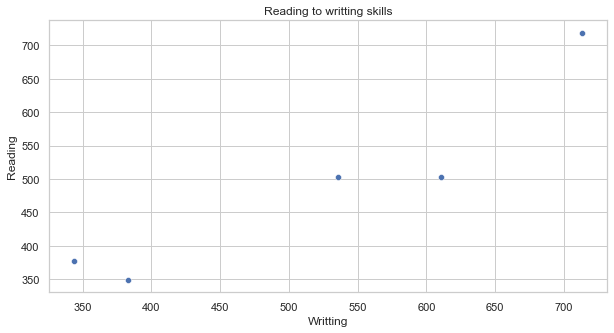

In [144]:
# Task 3 
# there is noticable correlation between writting and reading.
plt.figure(figsize = (10,5))
sns.scatterplot(data = df
               ,x = 'Writting'
               ,y = 'Reading').set_title('Reading to writting skills')

### Correlation

| Word |  | Definition |
| :- | :- | :- |
| linear correlation coefficient | - | A measure of relationship between two variables. Very useful for direct interpretation as it takes on values from -1,1.
| correlation | - | A measure of the relationship between two variables. There are several ways to compute it, the most common being the linear correlation coefficient.

### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| Correlation | ρxy = Cov(x,y)/std(x) * std(y) | Covariance between two variables divided by std x times std y |

If ρxy or rxy = 1: It is perfect positive correlation. The entire variability of one variable is explained by the other.<br>
If ρxy or rxy = 0: Two variables are absolutely independent from each other.<br>
If ρxy or rxy = -1: It is imperfect negative correlation. Two variables move in the opposite directions.<br>

In [28]:
'''
Background You are given data on the SAT scores from the correlation exercise.
TODO:
1. Calculate the correlation coefficient of the two datasets.
2. Comment on the strength of the correlation between the two datasets

- There is very high positive correlation between two given variables
'''
# creating dataframe
df = pd.DataFrame({'Writting': [344,383,611,713,536]
                  ,'Reading': [378,349,503,719,503]})

In [145]:
# Task 1
# calculating means for x and y
xx = df['Writting'].mean()
yy = df['Reading'].mean()

# claculating standard deviations for x and y
s_x = df['Writting'].std()
s_y = df['Reading'].std()

# sample size
n = df.shape[0]

# calculating covariance 
sxy = (sum((df['Writting'] - xx)* (df['Reading']- yy)))/(n-1)
print('Covariance: ', sxy)

# calculating correlation
ρxy = sxy/(s_x*s_y)
print('Correlation: ', ρxy)

Covariance:  21155.55
Correlation:  0.938125713331758


***
## <a class="anchor" id="4">Part 4: Practical Example Descriptive Statistics</a>

In [2]:
'''
Title: Practical example. Real estate business
TODO:
1. What are the types of data and the levels of measurement of the following variables: Cust ID, Mortgage, Year of sale.
2. Create a frequency distribution graph (that is a histogram with the highest possible number of bins - 267). Use data on all properties, no matter if sold or not.	
3. Create a histogram which represents the Price variable. Choose interval width (bins) of length $100,000. If you don't know how to do that, refer to the Course notes on descriptive statistics provided with the first lecture in this section. Use the data on all properties, no matter if sold or not.	
4. Interpret the results.
- Majority of the houses are within 200-300k price range.
5. Create a scatter plot showing the relationship between Price and Area. Use the data on all properties, no matter if sold or not. Interpret the results.
- There is high linear correlation between area and price.
6. Create a frequency distribution table, where you list all the countries from which the company has buyers. Count the absolute frequency, the relative frequency and the cumulative frequency. 	
7. Create a Pareto diagram representing the data.	
8. Calculate the mean, median, mode, skewness, variance and standard deviation of Price for all properties, no matter if sold or not.	
9. Interpret the measures.
 Distribution is positively/right skewed. With some large outliers to the right of the chart.
10. Calculate the covariance and correlation coefficient between Price and Area, no matter if the property is sold or not. Is the result in line with the scatter plot?
'''
# reading in the file
df = pd.read_csv('Data/Real_Estate_Agency.csv')
# data preprocessing on price column
df['Price'] = df['Price'].str.replace('$','').str.replace(',','').astype('float')
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005.0,11.0,Apartment,30,743.09,246172.68,Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,1029,1,2005.0,10.0,Apartment,29,756.21,246331.90,Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,2002,2,2007.0,7.0,Apartment,2,587.28,209280.91,Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452667.01,Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467083.31,Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


In [3]:
# Task 1
df.loc[:,['Customer ID', 'Mortgage','Year of sale']].dtypes

Customer ID      object
Mortgage         object
Year of sale    float64
dtype: object

In [4]:
# Customer ID is a categorical date type. Level of measurement is a qualitative nominal. This variable has the same properties as ID.
df['Customer ID'].value_counts().head()

C0174    9
C0079    7
C0069    3
C0048    2
C0144    2
Name: Customer ID, dtype: int64

In [5]:
# Mortgage is a categorical data type Level of measurenment is a qualitative nominal. This is a Binary variable. Like a Yes/No question or Gender.
df['Mortgage'].value_counts()

No     134
Yes     61
Name: Mortgage, dtype: int64

In [6]:
# Year of sale is a numerical, discret data type. Level of measurenment is a quantitative interval
df['Year of sale'].value_counts().head()

2007.0    102
2006.0     40
2005.0     27
2004.0     16
2008.0      9
Name: Year of sale, dtype: int64

Text(0.5, 1.0, 'Price distribution with 5 bins')

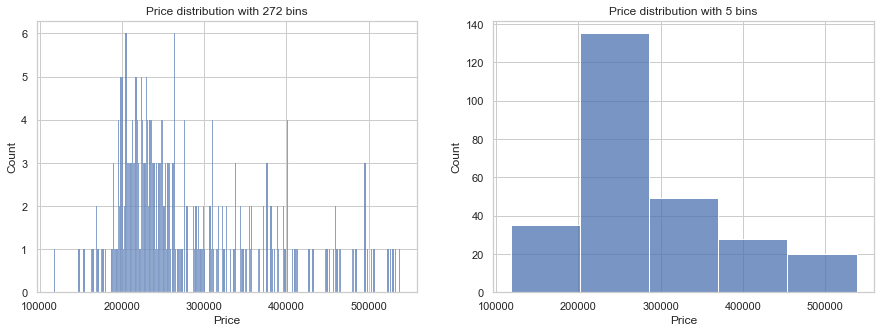

In [7]:
# Task 2 & 3
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.histplot(ax = axes[0]
            ,data = df
            ,x = 'Price'
            ,bins = 272).set_title('Price distribution with 272 bins')
sns.histplot(ax = axes[1]
            ,data = df
            ,x = 'Price'
            ,bins = 5).set_title('Price distribution with 5 bins')

Text(0.5, 1.0, 'Area to Price relation')

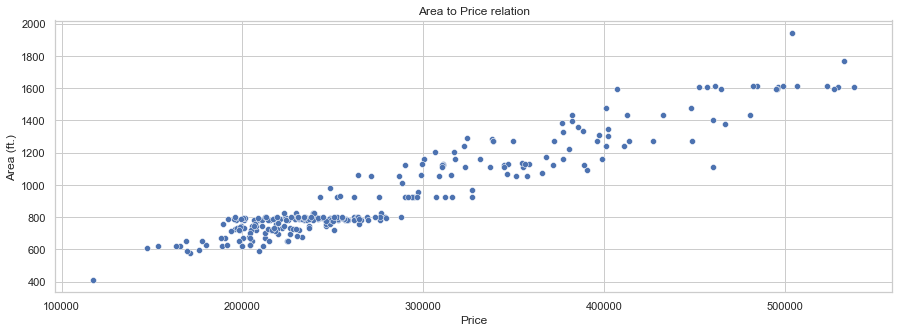

In [8]:
# Task 5
plt.figure(figsize=(15,5))
sns.scatterplot(data = df
               ,x = 'Price'
               ,y = 'Area (ft.)').set_title('Area to Price relation')

In [9]:
# Task 6
# calculating abs frequency
buyers_by_country = df.groupby('Country')['Customer ID'].count().reset_index().rename(columns = {'Customer ID': 'Absolute_Frequency'}).sort_values(by = 'Absolute_Frequency'
                                                                                                                                                  ,ascending = False)
# calculating relative frequency
total = buyers_by_country['Absolute_Frequency'].sum()
buyers_by_country['Relative_Frequency'] = buyers_by_country['Absolute_Frequency'].apply(lambda x: (x/total)*100)
# calculating cumulative frequency
buyers_by_country['Cumulative_Frequency'] = 100 * buyers_by_country['Absolute_Frequency'].cumsum() / buyers_by_country['Absolute_Frequency'].sum()
buyers_by_country

,Country,Absolute_Frequency,Relative_Frequency,Cumulative_Frequency
7,USA,165,84.615385,84.615385
8,USA,12,6.153846,90.769231
1,Canada,7,3.589744,94.358974
5,Russia,4,2.051282,96.410256
0,Belgium,2,1.025641,97.435897
6,UK,2,1.025641,98.461538
2,Denmark,1,0.512821,98.974359
3,Germany,1,0.512821,99.487179
4,Mexico,1,0.512821,100.000000


<AxesSubplot:label='a2c0f32d-fbfa-4b58-b8a4-a61c8c6fee80', title={'center':'Pareto chart for buyers by country'}>

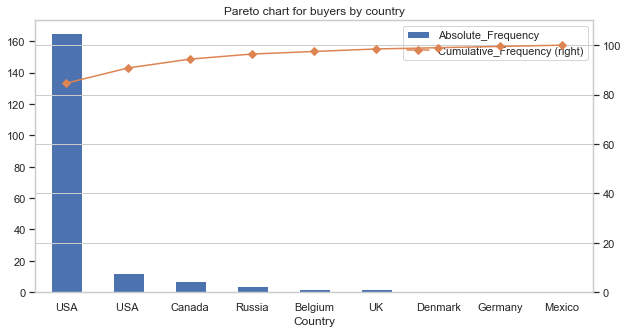

In [10]:
# Task 7
fig, axes = plt.subplots()
buyers_by_country.plot(use_index = True
                      ,y = 'Absolute_Frequency'
                      ,x= 'Country'
                      ,kind = 'bar'
                      ,ax = axes)
ax2 = buyers_by_country.plot(use_index=True
                            ,y = 'Cumulative_Frequency'
                            ,x= 'Country'
                            ,marker = 'D'
                            ,color = 'C1'
                            ,kind = 'line'
                            ,ax = axes
                            ,secondary_y = True
                            ,figsize = (10,5))
ax2.set_ylim([0,110])
ax2.set_title('Pareto chart for buyers by country')
ax2

In [11]:
# Task 8 (pandas describe)
df['Price'].describe()

count       267.000000
mean     281171.901386
std       89119.121005
min      117564.070000
25%      217553.055000
50%      249075.660000
75%      326964.855000
max      538271.740000
Name: Price, dtype: float64

In [12]:
# Task 8 
print('Mean price: ', df['Price'].mean())
print('Median price: ', df['Price'].median())
print('Mode of price: ', df['Price'].mode())
print('Skeweness of price: ', df['Price'].skew())
print('Price variance: ', df['Price'].var())
print('Price standard deviation: ', df['Price'].std())

Mean price:  281171.9013857681
Median price:  249075.66
Mode of price:  0    460001.26
dtype: float64
Skeweness of price:  1.096014932145483
Price variance:  7942217728.650507
Price standard deviation:  89119.12100470082


In [14]:
# Task 10
# means for x and y
xx = df['Price'].mean()
yy = df['Area (ft.)'].mean()
print('Mean x: {}, Mean y: {}'.format(xx,yy))
# sample size
n = df.shape[0]
print('Sample size: ', n)
# std for x and y
s_x = df['Price'].std()
s_y = df['Area (ft.)'].std()
print('Std x: {}, Std y: {}'.format(s_x, s_y))
# caclulating covariance
sxy = (sum((df['Price'] - xx) * (df['Area (ft.)']- yy)))/(n-1)
print('Covariance: ', sxy)
# calculating correlation
ρxy = sxy/(s_x*s_y)
print('Correlation: ', ρxy)

Mean x: 281171.9013857681, Mean y: 936.221310861423
Sample size:  267
Std x: 89119.12100470082, Std y: 284.8948578449084
Covariance:  24147707.28908276
Correlation:  0.9510873336790359


In [15]:
# pandas correlation
df[['Price','Area (ft.)']].corr()

,Price,Area (ft.)
Price,1.000000,0.951087
Area (ft.),0.951087,1.000000


In [16]:
# pandas correlation
corre = df[['Price','Area (ft.)']].corr().reset_index()
corre.iloc[1,1]

0.9510873336790351